In [2]:
from data_generation.gen_data import *
from model.utils import *

import seaborn as sns
import numpy as np

In [59]:
num_days = [365]
num_samples = [100000]
ratios = [0.8]
dist = "logistic"
mode = "histogram"

num_days_num_samples_ratios = [(num_day, num_sample, ratio) for num_day in num_days for num_sample in num_samples for ratio in ratios]

for num_day, num_sample, ratio in tqdm(num_days_num_samples_ratios):
    data = generate_data(num_day, num_sample, dist=dist, mode=mode, normal_ratio=ratio, visualize=False)
    with open(f"../data/test/{mode}/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy", "wb") as f:
        np.save(f, data)

  0%|          | 0/1 [00:00<?, ?it/s]

Generating logistic distribution, 365 days, 100000 samples...


100%|██████████| 1/1 [04:16<00:00, 256.51s/it]


# Converting plain to histogram data

In [54]:
num_day = 183
num_sample = 100000
dist = "logistic"
mode = "plain"

data_path = f"../data/test/{mode}/{dist}_{num_day}_days_{num_sample}_samples_80.npy"
data = np.load(data_path)
data.shape

(183, 100001)

In [55]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(183, 100000)
(183,)


In [56]:
min_edge, max_edge = 300, 850
bin_edges = np.arange(min_edge, max_edge + 1, 1)

new_data = []
for i in range(data.shape[0]):
    new_data.append(np.array(np.histogram(X[i], bins=bin_edges)[0].tolist() + [y[i]]))
new_data = np.array(new_data)
new_data.shape

(183, 551)

In [57]:
with open(f"../data/test/histogram/{dist}_{num_day}_days_{num_sample}_samples_80.npy", "wb") as f:
    np.save(f, new_data)

In [58]:
data_path = f"../data/test/histogram/{dist}_{num_day}_days_{num_sample}_samples_80.npy"
data = np.load(data_path)
data.shape

(183, 551)

# Visualization

In [32]:
data_path = f"../data/train/plain/logistic_30_days_100000_samples_80.npy"
data = np.load(data_path)
data.shape

(30, 100001)

In [33]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(30, 100000)
(30,)


In [34]:
index_0 = np.where(y == 0)[0]
index_0

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [35]:
index_1 = np.where(y == 1)[0]
index_1

array([ 9, 12, 20])

0 0
1.6674254168111617e-26 True
0.027943397239226318 False
0.002993628261040435 False
0.006283487557327467 False
0.0632408813748851 False 

1 0
0.00026295161320873947 True
0.008518384471769891 False
0.00029638844968855974 False
0.0005844818013594662 False
0.016352605974012002 False 

2 0
9.137535683064792e-79 True
0.08348556524545978 False
0.022710903713279707 False
0.067853994082071 False
0.15721069646521701 True 

3 0
4.254933539479641e-25 True
0.021783830354186892 False
0.0018658655398765523 False
0.003799280296286631 False
0.04636703471796373 False 

4 0
7.722591629505503e-66 True
0.04878251407944456 False
0.008869383945049455 False
0.019251764463732505 False
0.11576546599795456 True 

5 0
4.2247659045790516e-13 True
0.015046624829393914 False
0.0008985179598281969 False
0.0018116048329128677 False
0.02718287726937667 False 

6 0
1.6827998015456229e-07 True
0.011675648681178215 False
0.0005428512930949713 False
0.0010906991725995266 False
0.02138071655221766 False 

7 0
8.278125611

/tmp/ipykernel_134967/2404685614.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


20 0
7.513072764622576e-24 True
0.01725363554219078 False
0.001187342222970039 False
0.002381867372962892 False
0.04430176713626169 False 

21 0
1.0090643516289677e-14 True
0.013638887649124713 False
0.0007446544876497352 False
0.0014882786311395339 False
0.03091133242252996 False 

22 0
2.15976384534299e-16 True
0.014096855611294501 False
0.0007962569114648558 False
0.0015899073129474416 False
0.03510171913713179 False 

23 0
2.987987155666175e-08 True
0.012677548677711934 False
0.0006422907745368599 False
0.0012858969647938456 False
0.021262240535646654 False 

24 0
1.5303827959850761e-24 True
0.018109494259124986 False
0.001306518729806163 False
0.0026240961028205986 False
0.04384383276777869 False 

25 0
1.0586414870923139e-25 True
0.01872671862009621 False
0.0013953255087395889 False
0.0028062222525438918 False
0.04966788431136031 False 



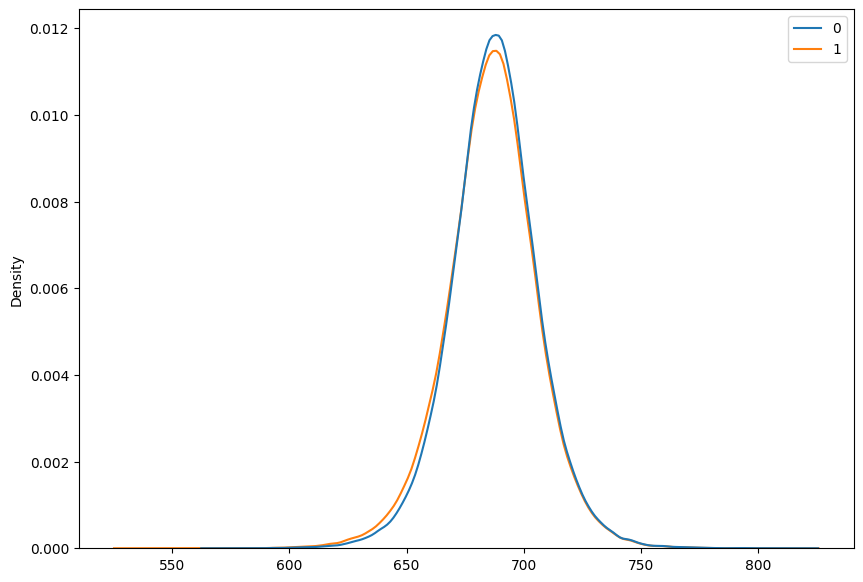

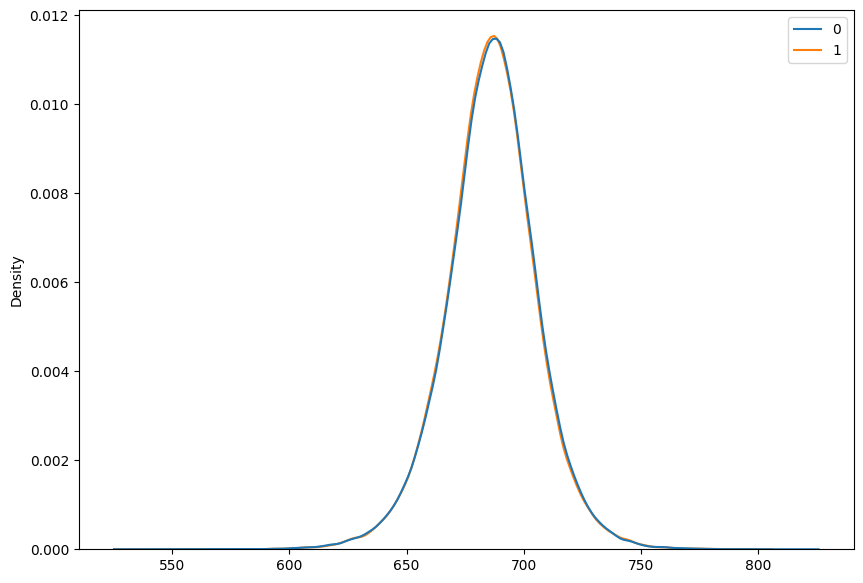

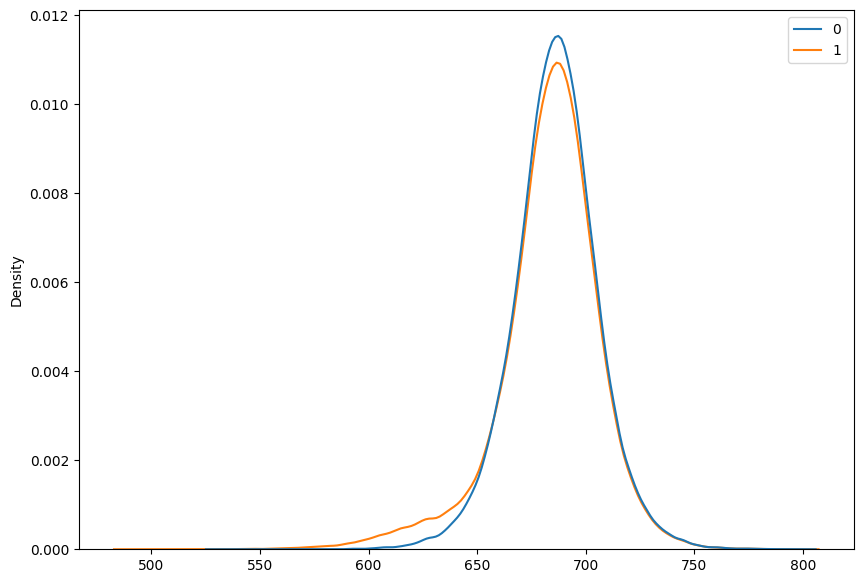

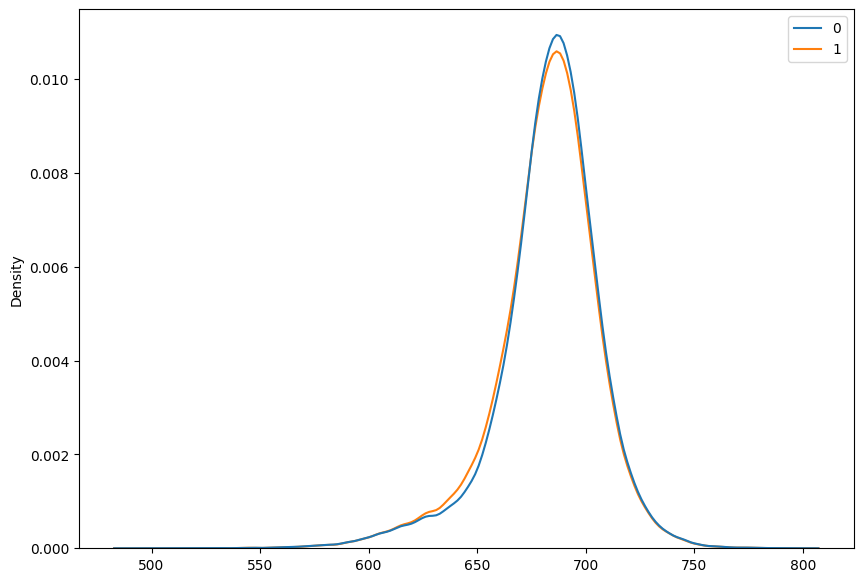

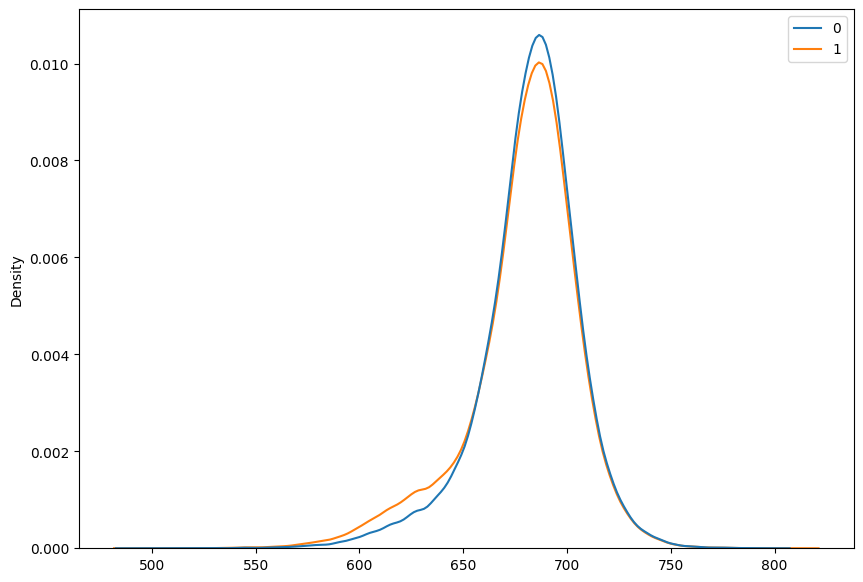

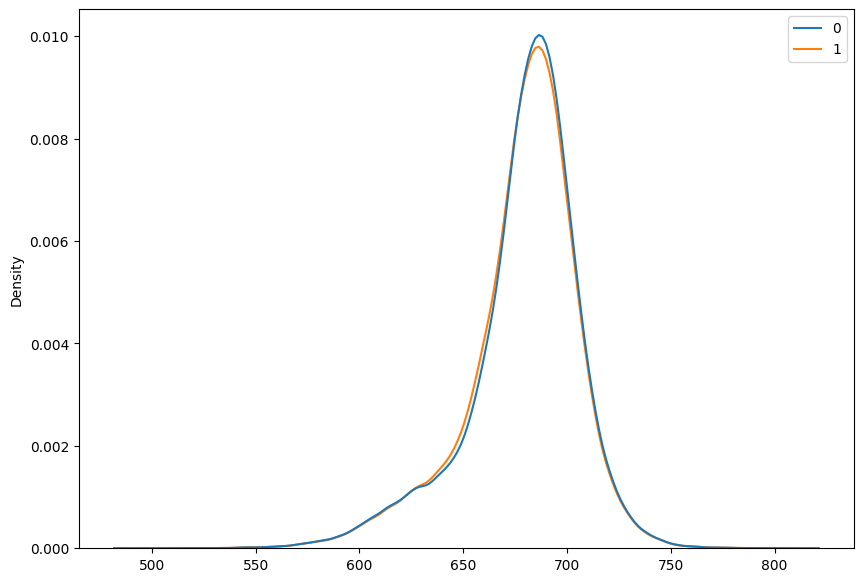

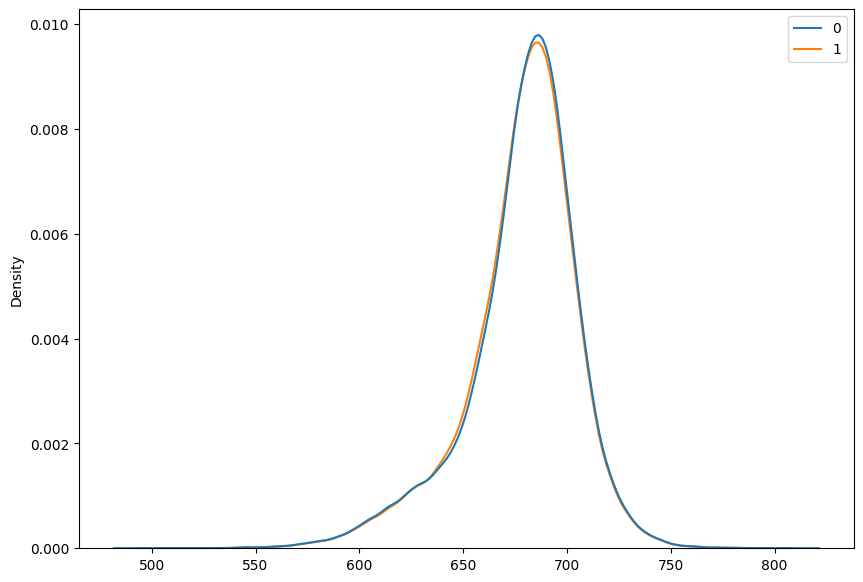

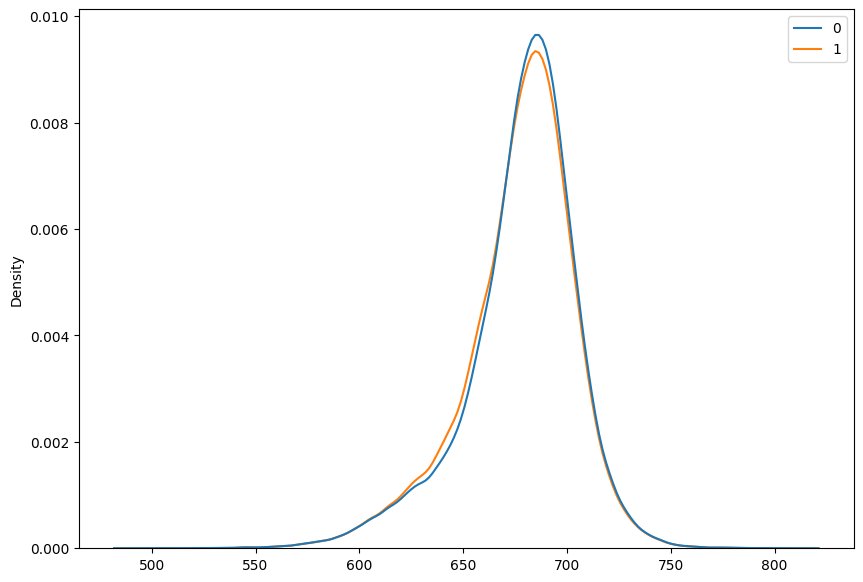

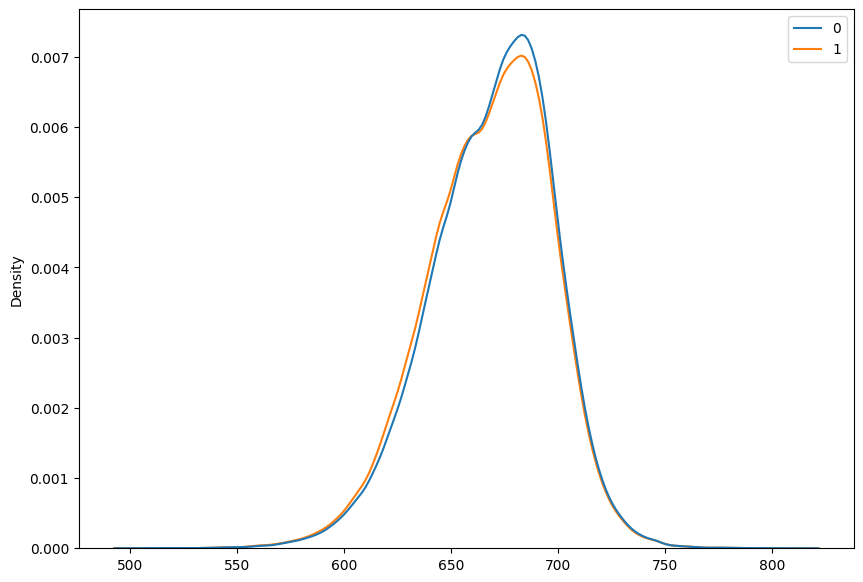

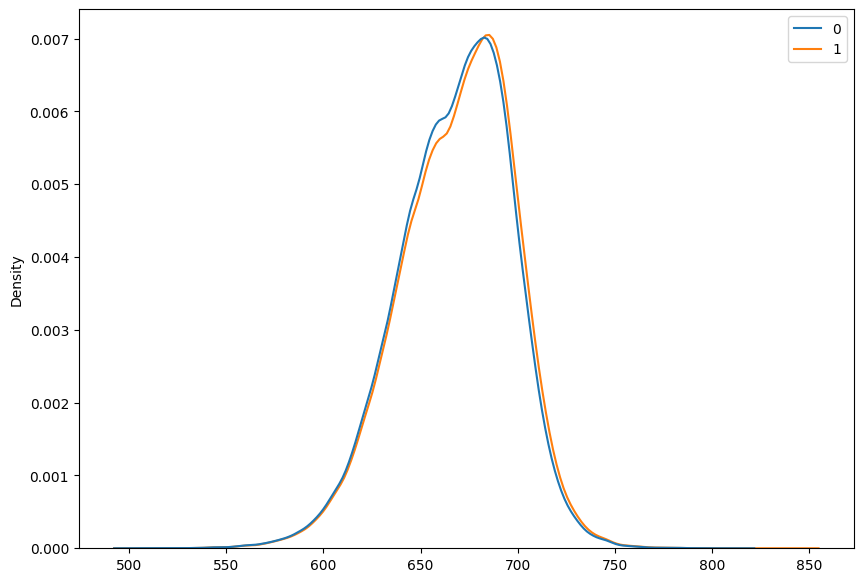

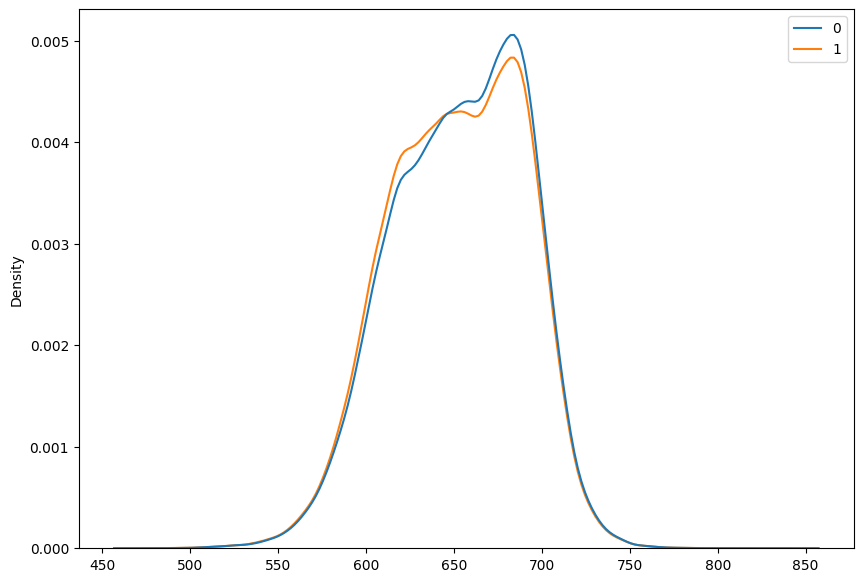

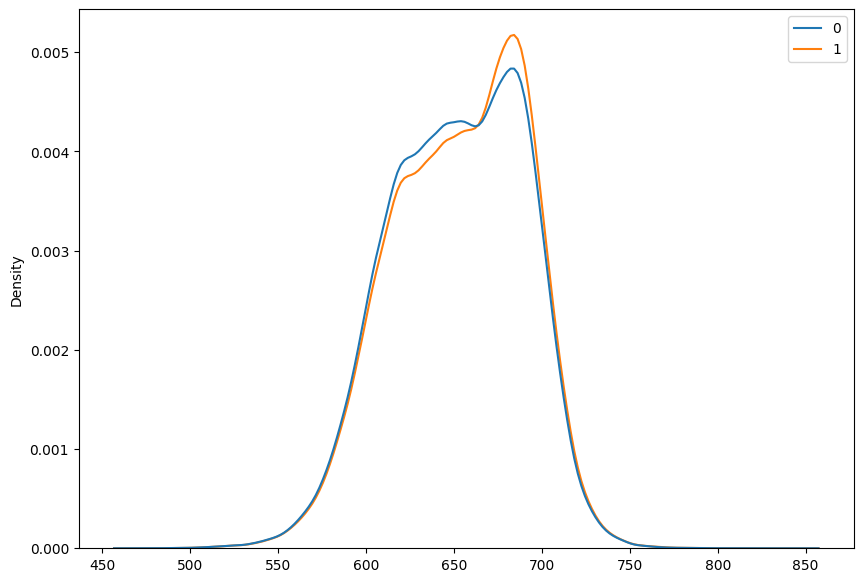

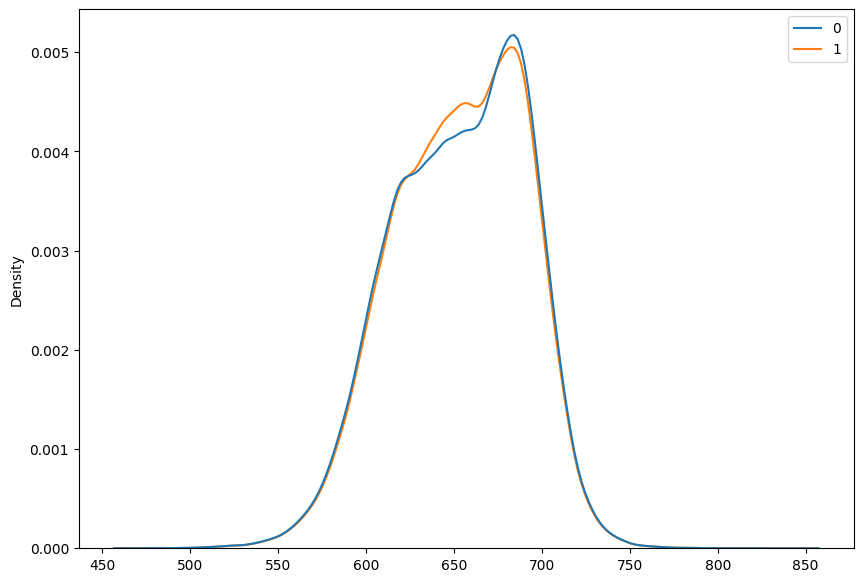

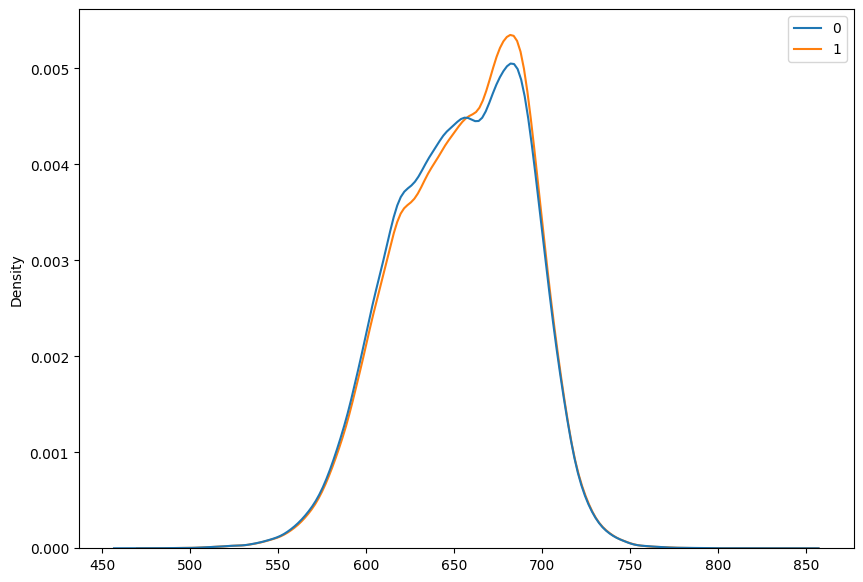

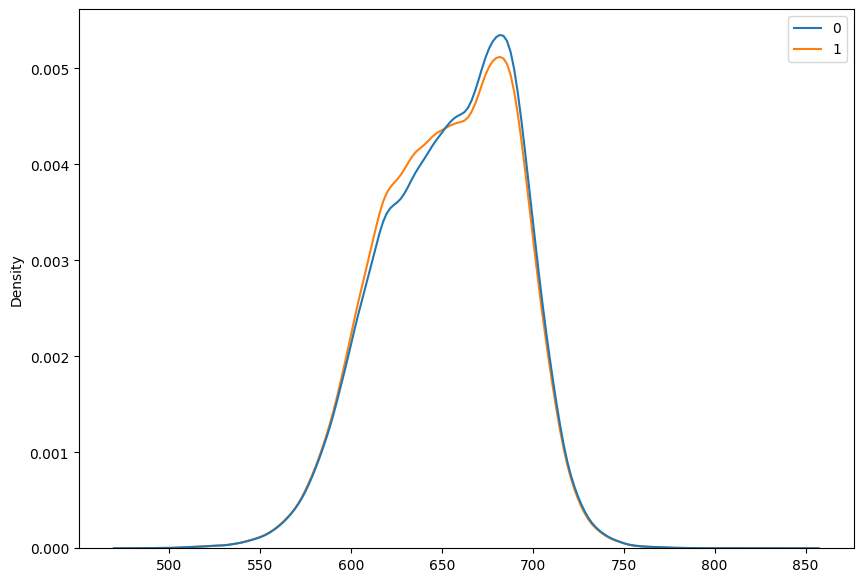

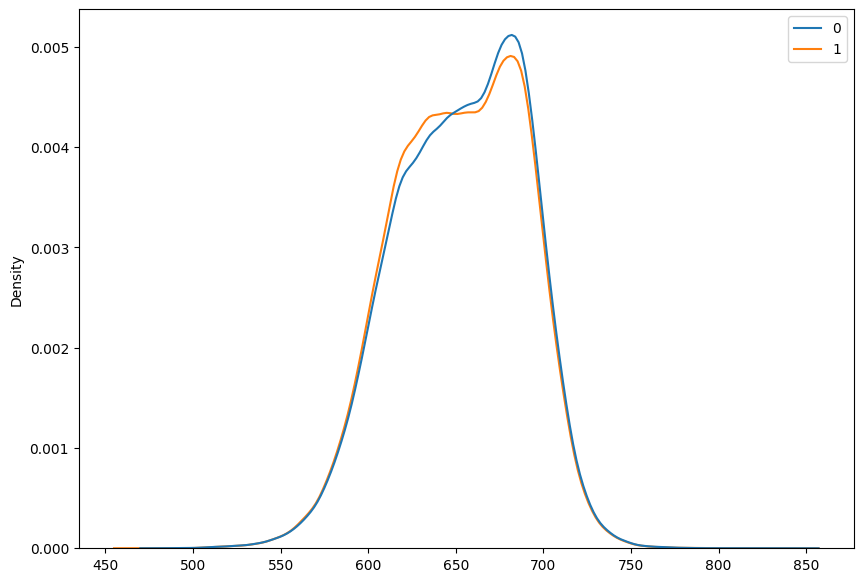

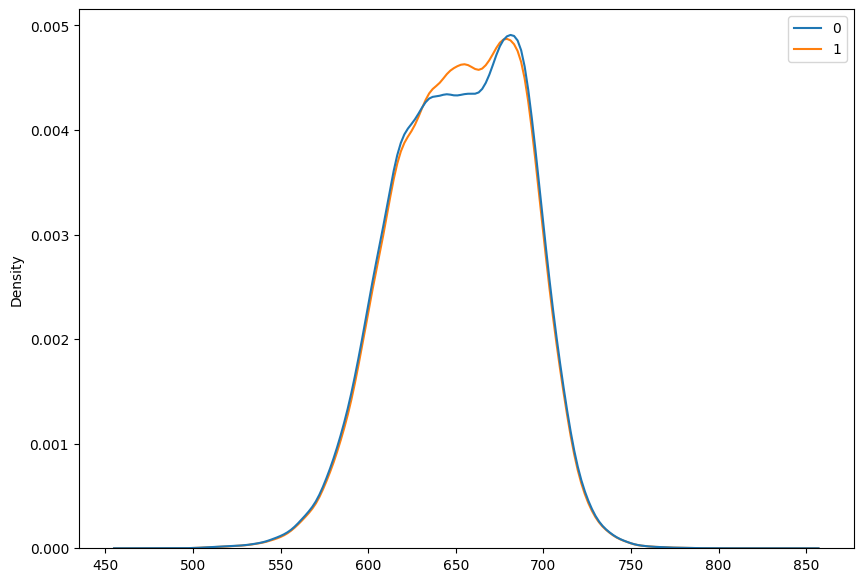

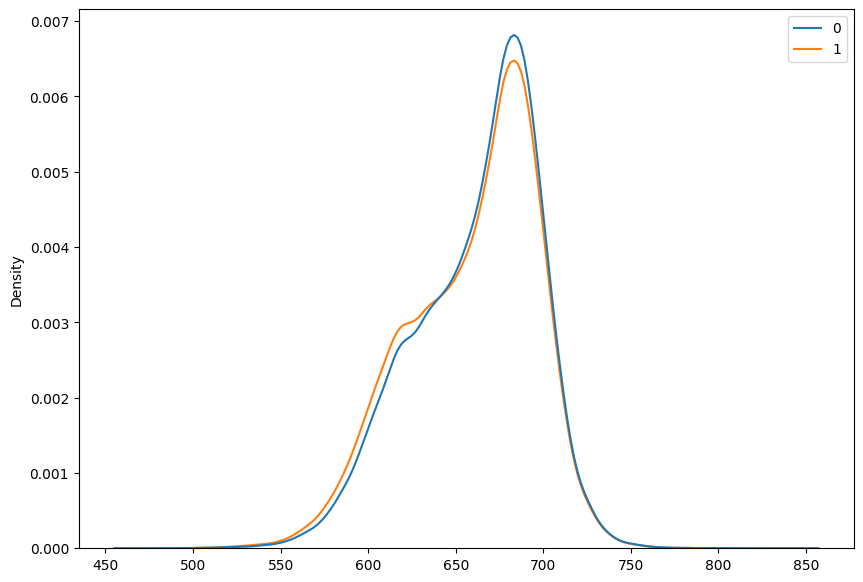

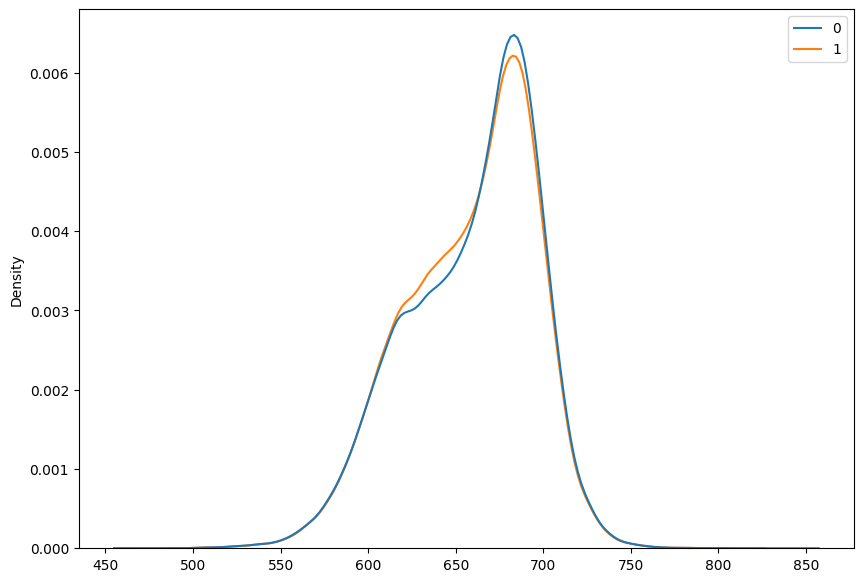

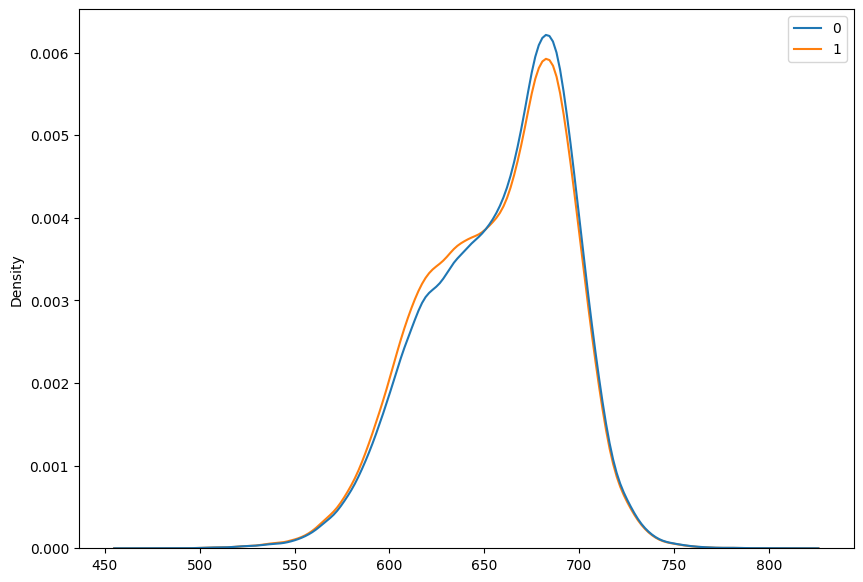

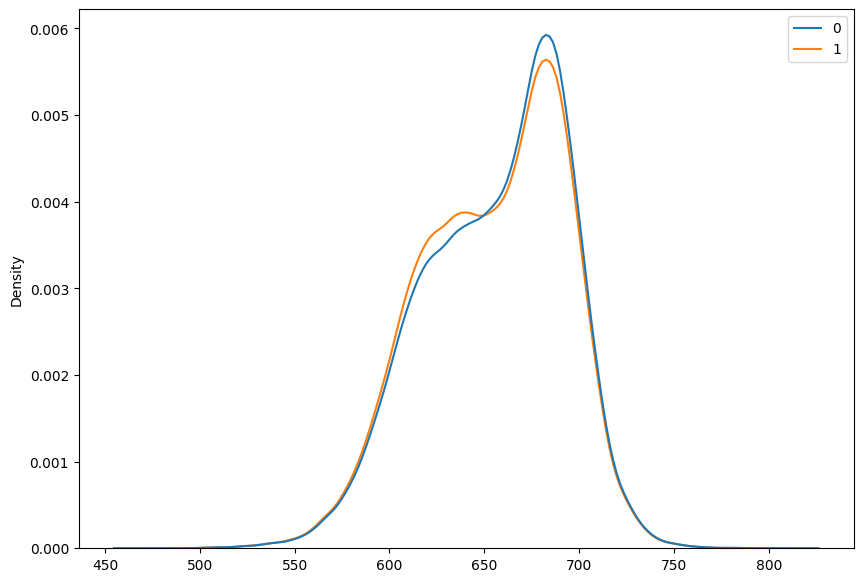

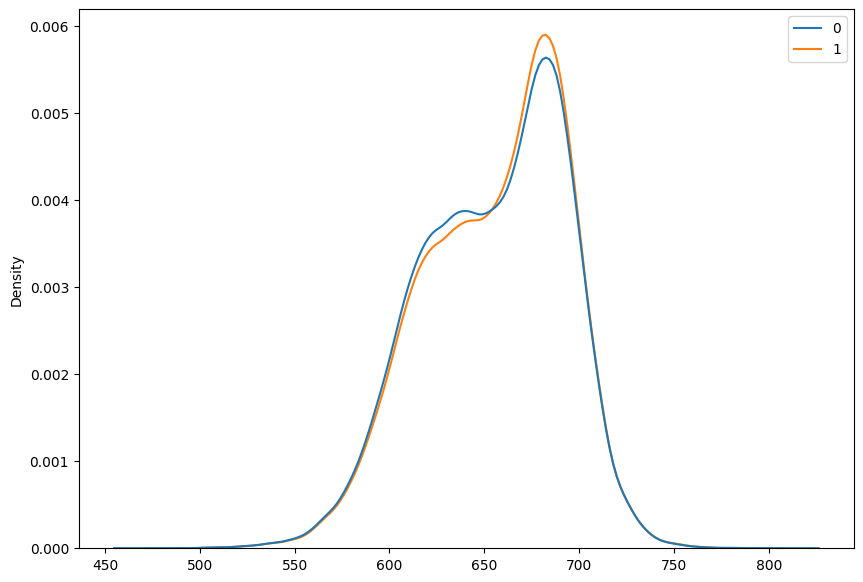

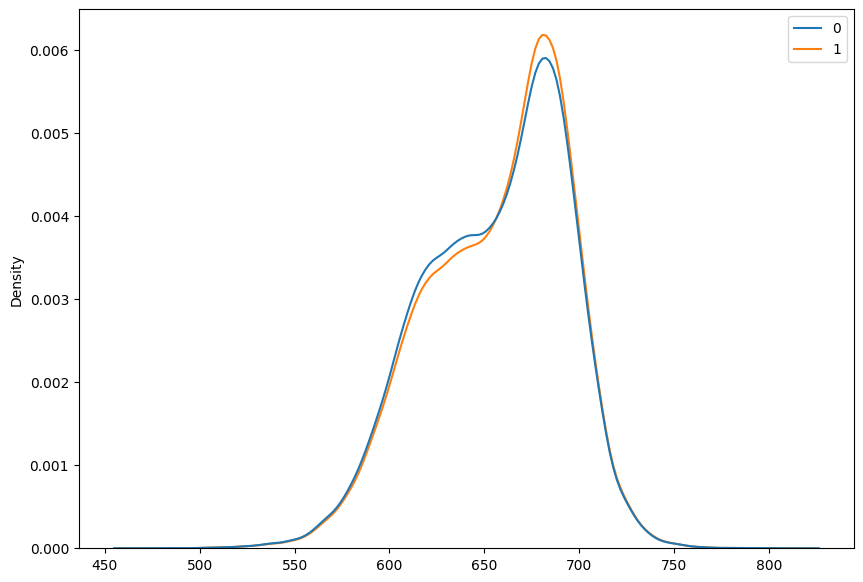

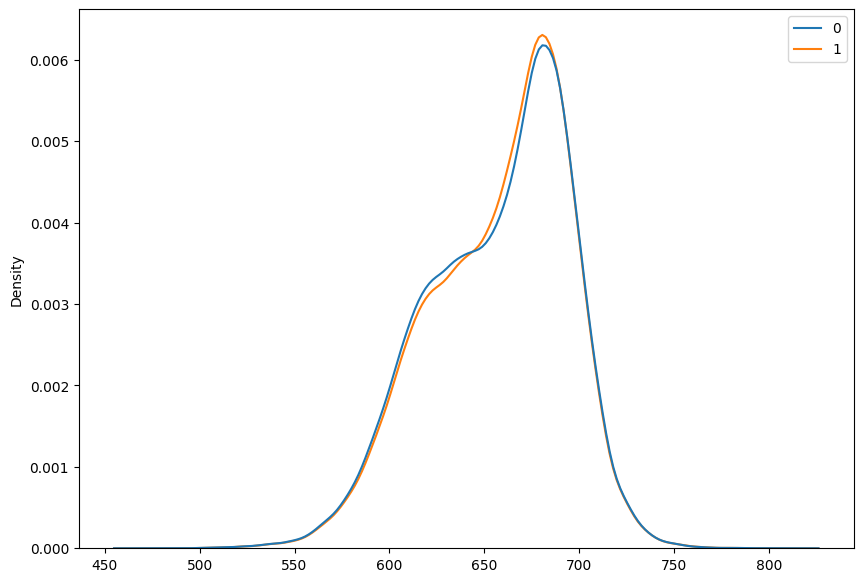

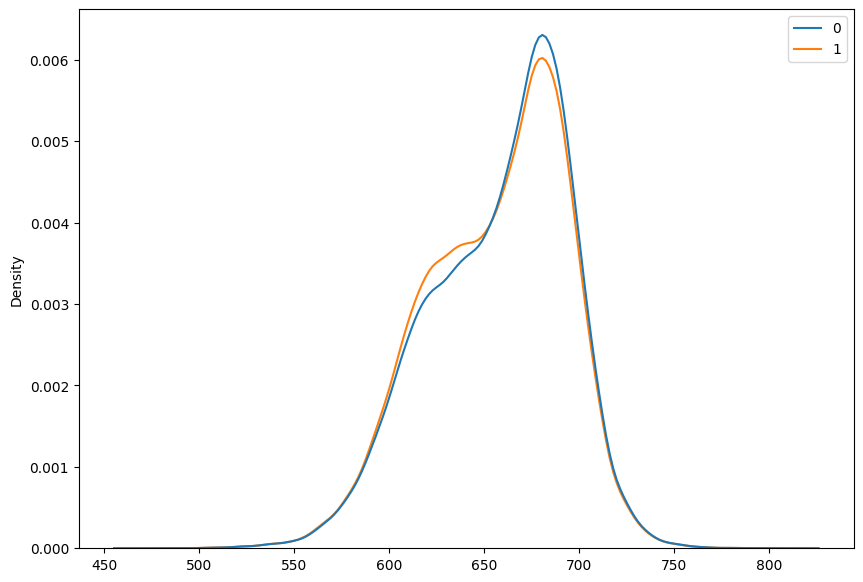

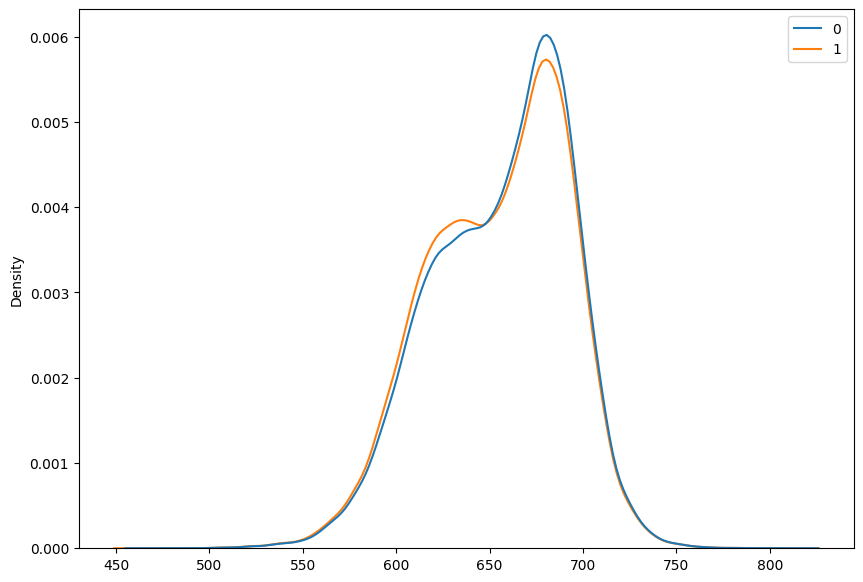

In [36]:
for idx, i in enumerate(index_0[1:]):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i - 1], X[i]])

    print(idx, y[i])

    value, is_drift = ks(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = js(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = kl_div(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = psi(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = wd(X[i - 1], X[i])
    print(value, is_drift, "\n")

0 1
0.0 True
0.18559730523899304 True
0.12225635392097539 True
0.2950400554512481 True
0.541288870822412 True 

1 1
0.0 True
0.10574664796427515 True
0.04480010300843682 False
0.08988775567839608 False
0.27178571511186406 True 



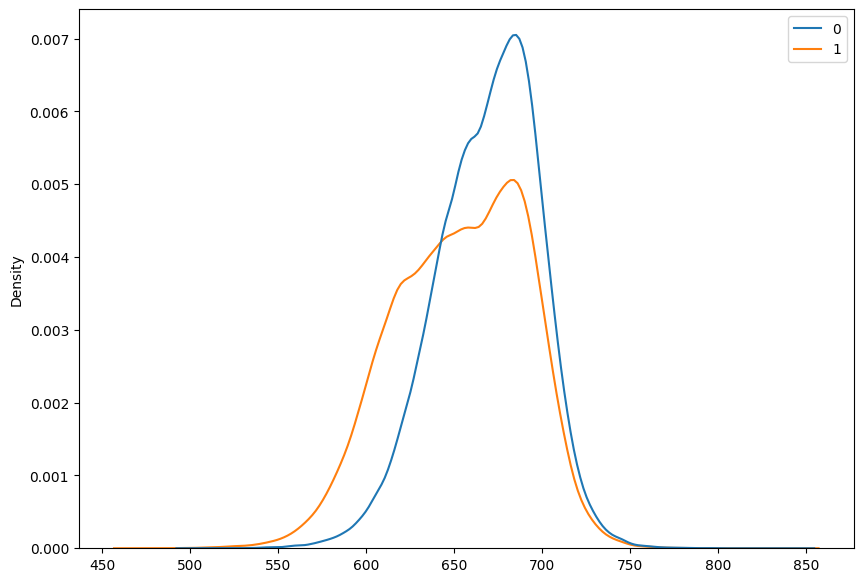

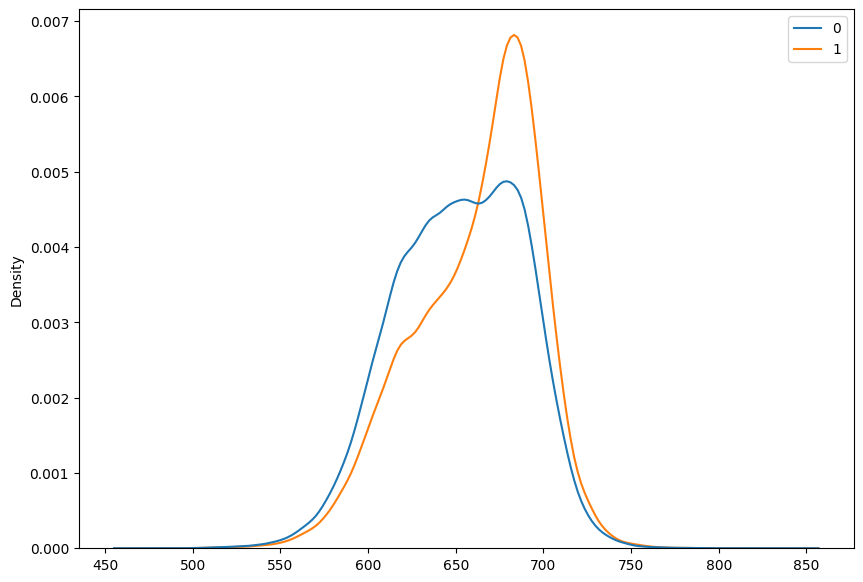

In [37]:
for idx, i in enumerate(index_1[1:]):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i - 1], X[i]])

    print(idx, y[i])

    value, is_drift = ks(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = js(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = kl_div(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = psi(X[i - 1], X[i])
    print(value, is_drift)

    value, is_drift = wd(X[i - 1], X[i])
    print(value, is_drift, "\n")